<a href="https://colab.research.google.com/github/ruperty/colab/blob/master/pct_diagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

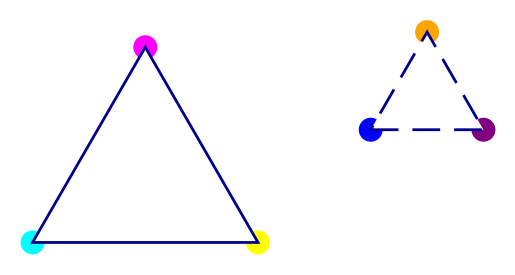

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

class IsoscelesTriangleDiagram:
    def __init__(self, base_length=1, position=(0, 0), circle_colors=('lightblue', 'red', 'green'),
                 line_style='--', circle_relative_size=0.1):
        self.base_length = base_length
        self.position = position
        self.height = np.sqrt((self.base_length ** 2) - (self.base_length / 2) ** 2)
        self.circle_radius = self.base_length * circle_relative_size
        self.dash_pattern = (10, 5) if line_style == '--' else None
        self.circle_colors = [self._convert_color(c) for c in circle_colors]
        self.line_style = line_style

    def _convert_color(self, color):
        if isinstance(color, tuple) and len(color) == 3:
            return tuple(c / 255.0 for c in color)  # Convert RGB to [0, 1] range
        return color  # Assume it's a named color if not an RGB tuple

    def create_patches(self):
        patches_list = []

        # Calculate vertices based on base length and position
        x0, y0 = self.position
        vertices = [
            (x0, y0),
            (x0 + self.base_length, y0),
            (x0 + self.base_length / 2, y0 + self.height)
        ]

        # Define the circle properties
        circle_properties = [
            (vertices[0], self.circle_colors[0]),  # Bottom-left
            (vertices[2], self.circle_colors[1]),  # Top
            (vertices[1], self.circle_colors[2])   # Bottom-right
        ]

        # Add circles to the vertices
        for (vertex, color) in circle_properties:
            circle = patches.Circle(vertex, radius=self.circle_radius, color=color, zorder=1)
            patches_list.append(circle)

        # Create the isosceles triangle
        triangle = patches.Polygon(
            vertices, closed=True, fill=True, edgecolor='darkblue', linestyle=self.line_style, linewidth=2, facecolor='white', zorder=2
        )
        if self.dash_pattern:
            triangle.set_linestyle((0, self.dash_pattern))  # Set custom dash pattern if needed
        patches_list.append(triangle)

        return patches_list

# Function to display multiple objects
def display_diagrams(diagrams, save_path='isosceles_triangle_diagram.png'):
    fig, ax = plt.subplots()

    for diagram in diagrams:
        patches_list = diagram.create_patches()
        for patch in patches_list:
            ax.add_patch(patch)

    # Set the aspect ratio and limits
    ax.set_aspect('equal')
    buffer = max(d.base_length for d in diagrams) * 0.1
    min_x = min(d.position[0] for d in diagrams) - buffer
    max_x = max(d.position[0] + d.base_length for d in diagrams) + buffer
    min_y = min(d.position[1] for d in diagrams) - buffer
    max_y = max(d.position[1] + d.height for d in diagrams) + buffer
    ax.set_xlim(min_x, max_x)
    ax.set_ylim(min_y, max_y)

    # Remove axis
    ax.axis('off')

    # Save the diagram
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()

# Example usage:
triangle_diagram1 = IsoscelesTriangleDiagram(
    base_length=2, 
    position=(0, 0), 
    circle_colors=((0, 255, 255), (255, 0, 255), (255, 255, 0)),  # Cyan, magenta, yellow in RGB
    line_style='-', 
    circle_relative_size=0.05
)
triangle_diagram2 = IsoscelesTriangleDiagram(
    base_length=1, 
    position=(3, 1), 
    circle_colors=((0, 0, 255), (255, 165, 0), (128, 0, 128)),  # Blue, orange, purple in RGB
    line_style='--', 
    circle_relative_size=0.1
)
display_diagrams([triangle_diagram1, triangle_diagram2])


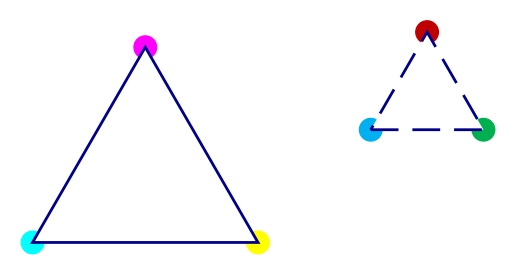

In [5]:
# Example usage:
triangle_diagram1 = IsoscelesTriangleDiagram(
    base_length=2, 
    position=(0, 0), 
    circle_colors=((0, 255, 255), (255, 0, 255), (255, 255, 0)),  # Cyan, magenta, yellow in RGB
    line_style='-', 
    circle_relative_size=0.05
)
triangle_diagram2 = IsoscelesTriangleDiagram(
    base_length=1, 
    position=(3, 1), 
    circle_colors=((0, 176, 240), (192, 0, 0), (0, 176, 80)),  # Blue, orange, purple in RGB
    line_style='--', 
    circle_relative_size=0.1
)
display_diagrams([triangle_diagram1, triangle_diagram2])
